## Statistical Thinking


Deiry Sofía Navas Muriel 

Ingeniería de sistemas 

Universidad de Antioquia

### Lo que hemos visto hasta ahora ...

*  Importing data 
*  Cleaning Data **
* Loading and viewing your data
* Summary statistics
* Visual  data analysis
* Tidying data for analysis
* Lambda functions
* Y ...

![alt text](panda.jpg "Title")

* Dataframe **EVERYWHERE**

In [36]:
! pip install --upgrade pip
! pip install matplotlib numpy seaborn sklearn

import pandas as pd

import numpy as np

# Biblioteca usada para diseñar y mostrar graficos.
import matplotlib.pyplot as plt 

from sklearn import datasets 

Requirement already up-to-date: pip in /home/sofia/py3/lib/python3.5/site-packages (18.0)


Metodos para el análisis de nuestro conjunto de datos, tales como:

``` df_air.head() ```
``` df_air.describe() ```
``` df_air.colmuns ```
``` df_air.index ```
``` df_air.shape ```
``` df_air.size ```


¿Quién da más? 


### Desde un punto de vista del aprendizaje autómatico (Machine Learning)

El aprendizaje automatico, es el estudio de sistemas que aprenden apartir de un conjunto de datos y pueda con datos nuevos **predecir** comportamientos o tomar decisiones automáticamente. 

> Machine learning provides, developing methods that can automatically detect patterns in data and then use the uncovered patterns to predict future data.

> Machine learning is a branch of artifcial intelligence. Using computing, we design systems that can learn from data in a manner of being trained. The systems might learn and improve with experience, and with time, re ne a model that can be used to predict outcomes of questions based on the previous learning. [1]

![alt text](ml.jpeg "Title")


Ahora bien, ¿cómo realizamos la predicción?

![alt text](estadistica.jpg "Title")


En el curso #15 se aborda la estadistica, despues de obtener y pre-procesarla queremos sacar conclusiones  se debe hacer inferencia a la estadística. 


### Ahora bien ... vamos a la acción

Vamos a echarle a un vistazo a este basa de datos, corresponde a una campaña de marketing por un banco portuguese realizado por llamadas télefonicas. 

**Objetivo** Predecir si el cliente se va a subscribir a un depósito a plazo.

![alt_text](summary.jpg "Summary")

[Data](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)



In [15]:
df_bank = pd.read_csv("bank-full.csv", sep=";")
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [14]:
df_bank = pd.read_csv("weather.csv", sep=";")
df_bank.head()

,date,temperaturemin,temperaturemax,precipitation,snowfall,snowdepth,avgwindspeed,fastest2minwinddir,fastest2minwindspeed,fastest5secwinddir,...,drizzle,snow,freezingrain,smokehaze,thunder,highwind,hail,blowingsnow,dust,freezingfog
0,2009-10-03,55.0,82.0,0.00,0.0,0.0,2.91,240.0,16.11,230.0,...,No,No,No,No,No,No,No,No,No,No
1,2009-10-10,59.0,79.0,0.02,0.0,0.0,7.83,220.0,17.00,220.0,...,No,No,No,No,No,No,Yes,No,No,No
2,2009-10-14,46.9,61.0,0.14,0.0,0.0,8.72,40.0,14.99,50.0,...,Yes,No,No,No,No,No,Yes,No,No,No
3,2009-10-17,45.0,57.9,0.00,0.0,0.0,6.26,30.0,14.09,40.0,...,No,No,No,No,No,No,No,No,No,No
4,2009-10-29,48.0,68.0,0.00,0.0,0.0,5.82,80.0,14.99,70.0,...,No,No,No,No,No,No,No,No,No,No


## Tipos de aprendizaje autómatico

### Aprendizaje predictivo o supervisado (Supervised Learning): 

Aprende a partir de entradas $\bf{x}$ con salidas $y$, se tiene conjunto de pares entrada-salida etiquetados $\mathcal{D} = \left\lbrace  \left( {\bf{x}}_i, y_i \right) \right\rbrace _{i=1} ^{N}$. En este caso $\mathcal{D}$ se conoce como el <b>conjunto de entrenamiento</b> y $N$ es el número de muestras de entrenamiento.

En una forma simple, cada muestra de entrenamiento ${\bf{x}}_i$ es un vector de números $d$-dimensional que representa variables que se desea modelar y que en el contexto del aprendizaje de máquinas es común llamarlas <b>características</b> (en inglés <b>features</b>).  

Extraído de: [Aquí](https://github.com/jdariasl/ML_IntroductoryCourse)  por Julián David Arias

![alt text](Supervised.png  "Supervised")



In [30]:
df_bank.shape

(45211, 17)


### Descriptivo o no supervisado (Unsupervised Learning)

En este caso unicamente se cuenta con un conjunto $\mathcal{D} = \left\lbrace  \left( {\bf{x}}_i \right) \right\rbrace _{i=1} ^{N}$; y el objetivo es encontrar ``patrones interesantes'' en los datos. Algunas veces se le llama <b>Descubrimiento de conocimiento</b>

Extraído de: [Aquí](https://github.com/jdariasl/ML_IntroductoryCourse)  por Julián David Arias

![alt text](Unsupervised.png  "Unsupervised")

### Tipos de problemas supervisados

En general ${\bf{x}}_i$ puede representar un objeto complejo, como una imagen, una frase, un mensaje de correo electrónico, un cliente, una serie de tiempo, una cadena de ADN, una molécula, un grafo, etc. En el aprendizaje supervisado, si la variable de salida $y_i$ toma valores discretos (es categórica), el problema de aprendizaje se conoce como <b>Clasificación</b>. Si por el contrario $y_i$ toma valores reales (continuos), el problema se conoce como <b>Regresión</b>.

Extraído de: [Aquí](https://github.com/jdariasl/ML_IntroductoryCourse)  por Julián David Arias

<b>Clasificación</b>

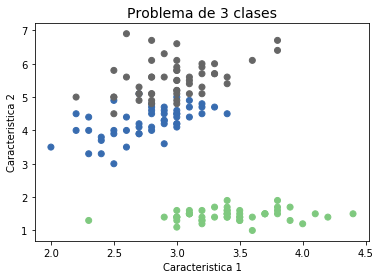

In [34]:
from sklearn import datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target
import matplotlib.pyplot as plt
plt.title('Problema de 3 clases', fontsize=14)
plt.xlabel('Caracteristica 1')
plt.ylabel('Caracteristica 2')
plt.scatter(X[:,1], X[:,2],c=y,cmap="Accent")
plt.show()

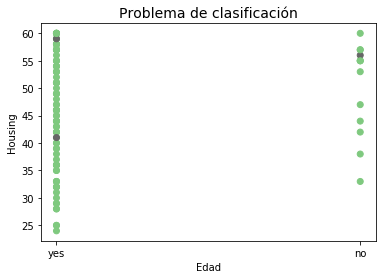

In [79]:
out = df_bank["y"]
out = out.replace("no", 0)
out = out.replace("yes", 1)
x = df_bank["housing"]
y = df_bank["age"]

import matplotlib.pyplot as plt
plt.title('Problema de clasificación', fontsize=14)
plt.xlabel('Edad')
plt.ylabel('Housing')
plt.scatter(x,y,c=out,cmap="Accent")
plt.show()


<b>Regresión</b>

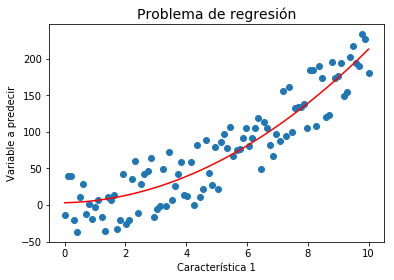

In [37]:
a = np.array([1, 2, 3])
x = np.linspace(0,10,100);
y1 = np.zeros(100)
y2 = np.zeros(100)
for i in range(len(x)):
    b = np.array([x[i],x[i]**2,1])
    y1[i] = sum(a*b +  30*(np.random.rand() - 0.5))
    y2[i] = sum(a*b)
plt.title(u'Problema de regresión', fontsize=14)
plt.xlabel(u'Característica 1')
plt.ylabel(u'Variable a predecir')
plt.scatter(x, y1)
plt.plot(x,y2,'r')
plt.show()

## ¿Cómo diferenciarlas?
#### En Regresión: 
Son aquellos conjunto de datos que en su variable respuesta $y$ valores continuos.

#### Clasificación 
Son aquellos conjunto de datos que en su variable respuesta $y$ valores discretos.


[1] Machine Learning - Hands-on for developers and technical professionals de Jason Bell.